In [68]:
import numpy as np
import pandas as pd

In [69]:
import keras

In [70]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

In [71]:
chicago_taxi_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

In [72]:
chicago_taxi_dataset.head()

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
0,05/17/2022 7:15:00 AM,05/17/2022 7:45:00 AM,7.25,2341,2.57,4.0,NaN,NaN,NaN,17.0,31.99,2.0,6.3,0.0,0.0,33.99,Mobile,Flash Cab
1,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1074,1.18,4.0,NaN,1.703108e+10,NaN,8.0,9.75,3.0,27.9,0.0,1.0,14.25,Credit Card,Flash Cab
2,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.25,0.0,0.0,0.0,0.0,10.25,Cash,Sun Taxi
3,05/17/2022 6:00:00 PM,05/17/2022 7:00:00 PM,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,23.75,0.0,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association
4,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.00,0.0,0.0,0.0,0.0,10.00,Cash,Flash Cab


In [73]:
training_df = chicago_taxi_dataset[['TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE']]

In [74]:
training_df.head()

,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0


In [75]:
training_df.shape

(31694, 6)

In [76]:
training_df.describe(include='all')

,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694,31694,31694.000000
unique,NaN,NaN,NaN,31,7,NaN
top,NaN,NaN,NaN,Flash Cab,Credit Card,NaN
freq,NaN,NaN,NaN,7887,14142,NaN
mean,8.289463,1319.796397,23.905210,NaN,NaN,12.965785
std,7.265672,928.932873,16.970022,NaN,NaN,15.517765
min,0.500000,60.000000,3.250000,NaN,NaN,0.000000
25%,1.720000,548.000000,9.000000,NaN,NaN,0.000000
50%,5.920000,1081.000000,18.750000,NaN,NaN,12.200000
75%,14.500000,1888.000000,38.750000,NaN,NaN,20.800000


In [77]:
training_df.corr(numeric_only=True)

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


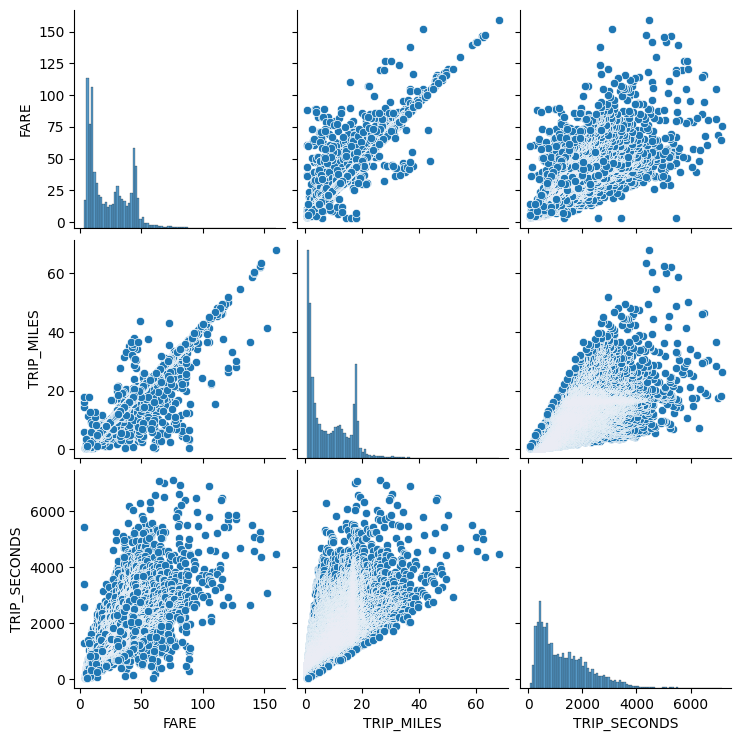

In [78]:
sns.pairplot(training_df, x_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"], y_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"])

In [79]:
from sklearn.model_selection import train_test_split

training_df = training_df.dropna()

In [80]:
xtrain, xtest, ytrain, ytest = train_test_split(training_df.drop(columns='FARE'), training_df['FARE'], test_size=0.2, random_state=42)

In [81]:
xtrain.head()

,TRIP_MILES,TRIP_SECONDS,COMPANY,PAYMENT_TYPE,TIP_RATE
7760,2.06,681,Sun Taxi,Cash,0.0
24614,9.53,1187,City Service,Prcard,0.0
19571,1.10,180,Choice Taxi Association,Credit Card,0.0
15097,17.60,3780,Taxi Affiliation Services,Credit Card,20.2
29616,15.61,1413,City Service,Credit Card,11.6


In [82]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

trf1 = ColumnTransformer([('num', StandardScaler(), [0,1,4])],remainder='passthrough')
trf2 = ColumnTransformer([('cat', OneHotEncoder(sparse_output=False,dtype=np.int32), [3,4])])
trf3 = LinearRegression()

In [83]:
pipe = Pipeline([
    
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
                 ])

In [96]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  [0, 1, 4])])),
                ('trf2',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(dtype=<class 'numpy.int32'>,
                                                                sparse_output=False),
                                                  [3, 4])])),
                ('trf3', LinearRegression())])

In [ ]:
ypred =pipe.predict(xtest)

In [103]:
from sklearn.metrics import mean_squared_error, r2_score


r2_score(ytest, ypred)

0.07266345056047419

In [138]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
xtrain.head()

,TRIP_MILES,TRIP_SECONDS,COMPANY,PAYMENT_TYPE,TIP_RATE
7760,2.06,681,Sun Taxi,Cash,0.0
24614,9.53,1187,City Service,Prcard,0.0
19571,1.10,180,Choice Taxi Association,Credit Card,0.0
15097,17.60,3780,Taxi Affiliation Services,Credit Card,20.2
29616,15.61,1413,City Service,Credit Card,11.6


In [ ]:
xtrain['TRIP_MILES'].skew()

np.float64(0.8851143586123378)

In [ ]:
xtrain['TRIP_SECONDS'].skew()

np.float64(1.0640765665065621)

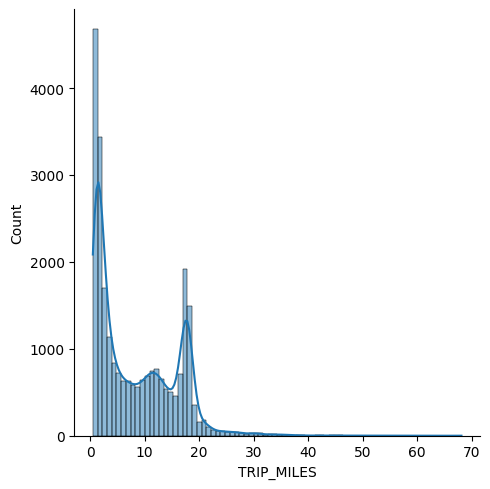

In [ ]:
sns.displot(xtrain['TRIP_MILES'], kde=True)

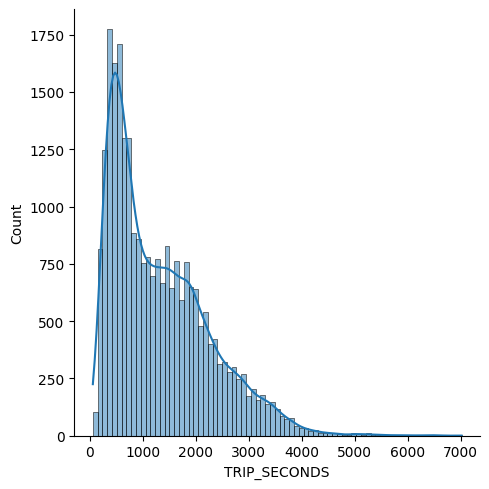

In [ ]:
sns.displot(xtrain['TRIP_SECONDS'], kde=True)

In [141]:
trf = FunctionTransformer(np.log1p, validate=True)
ptrf = PowerTransformer('yeo-johnson', standardize=True)
ptrf2 = PowerTransformer('box-cox', standardize=True)


In [143]:
Xtrain_Transformed = trf.fit_transform(X=xtrain[['TRIP_MILES', 'TRIP_SECONDS','TIP_RATE']])
Xtest_Transformed = trf.transform(X=xtest[['TRIP_MILES', 'TRIP_SECONDS','TIP_RATE']])

Xtrain_Transformed1 = ptrf.fit_transform(X=xtrain[['TRIP_MILES', 'TRIP_SECONDS','TIP_RATE']])
Xtest_Transformed1 = ptrf.transform(X=xtest[['TRIP_MILES', 'TRIP_SECONDS','TIP_RATE']])

Xtrain_Transformed2 = ptrf2.fit_transform(Xtrain_Transformed+0.0001)
Xtest_Transformed2 = ptrf2.transform(Xtest_Transformed+0.0001)

In [144]:
LR = LinearRegression()
LR1 = LinearRegression()
LR2 = LinearRegression()

In [145]:
LR.fit(Xtrain_Transformed, ytrain)
LR1.fit(Xtrain_Transformed1, ytrain)
LR2.fit(Xtrain_Transformed2, ytrain)


LinearRegression()

In [146]:
Ypred_Transformed = LR.predict(Xtest_Transformed)
Ypred_Transformed1 = LR.predict(Xtest_Transformed1)
Ypred_Transformed2= LR.predict(Xtest_Transformed2)

In [150]:

r2_score(ytest, Ypred_Transformed2)


-3.2309214174282834

In [114]:
X = training_df.iloc[:, [0, 1, 5]]

In [115]:
X_transformed = trf.fit_transform(X)

In [116]:
lr2 = LinearRegression()

In [152]:

from sklearn.model_selection import cross_val_score

print("LR",np.mean(cross_val_score(lr2, X_transformed, training_df['FARE'], cv=100, scoring='r2')))

LR 0.6652496832927659


In [131]:
Xtrain_Transformed = pd.DataFrame(Xtrain_Transformed, columns=['TRIP_MILES', 'TRIP_SECONDS', 'TIP_RATE'])

In [132]:
Xtrain_Transformed['TRIP_MILES'].skew()

np.float64(-0.07209649211837627)

In [133]:
Xtrain_Transformed['TRIP_SECONDS'].skew()

np.float64(-0.26912740296119075)

In [134]:
Xtrain_Transformed['TIP_RATE'].skew()

np.float64(-0.0743481334910493)

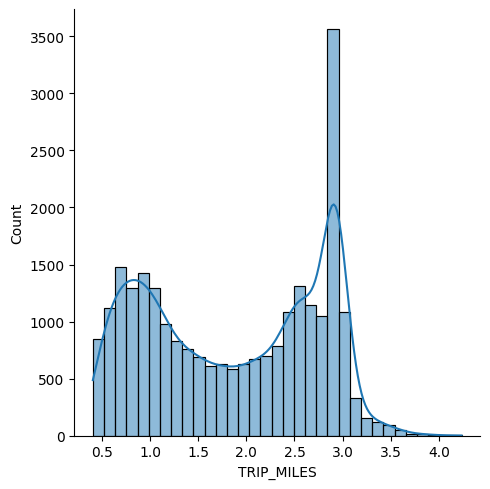

In [135]:
sns.displot(Xtrain_Transformed['TRIP_MILES'], kde=True)

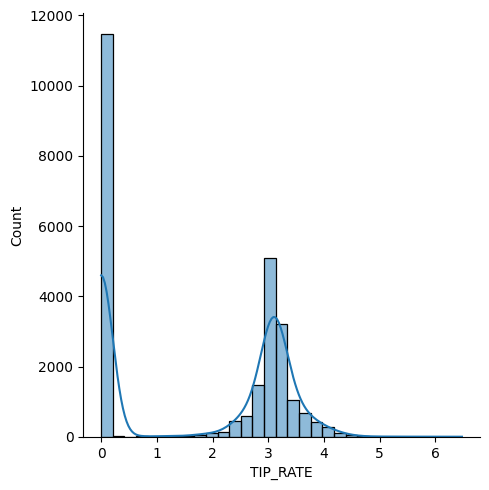

In [136]:
sns.displot(Xtrain_Transformed['TIP_RATE'], kde=True)

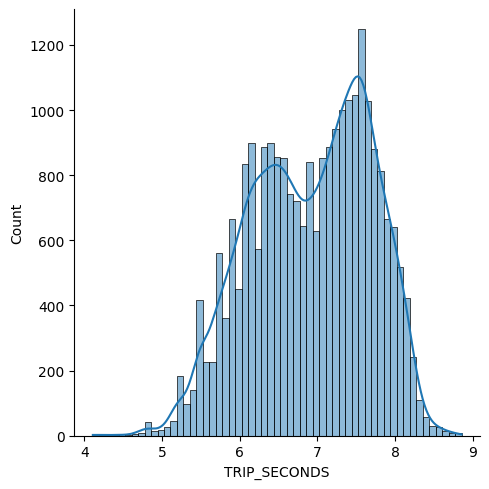

In [137]:
sns.displot(Xtrain_Transformed['TRIP_SECONDS'], kde=True)